In [1]:
import matplotlib.pyplot as plt
from probability_functions import *

In [2]:
def vline(xval):
    plt.axvline(x=xval, linewidth=0.5,color='r',linestyle='--')

Text(0.5,0,'$F_{\\mathrm{minor}}/F_{\\mathrm{sym}}$')

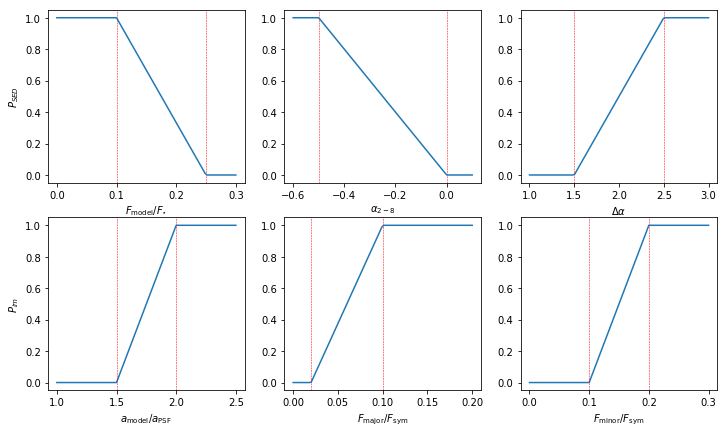

In [3]:
plt.figure(figsize=(12,7))

plt.subplot(231)
x1 = np.linspace(0,0.3,100);vline(0.1);vline(0.25)
plt.plot(x1,P1(x1)); plt.ylabel('$P_{SED}$');plt.xlabel('$F_{\mathrm{model}}/F_{\star}$')

plt.subplot(232)
x2 = np.linspace(-0.6,0.1,100);vline(0);vline(-0.5)
plt.plot(x2, Pcolor(x2));plt.xlabel(r'$\alpha_{2-8}$')

plt.subplot(233)
x3=np.linspace(1,3,100)
plt.plot(x3, P3(x3));vline(1.5);vline(2.5);plt.xlabel(r'$\Delta \alpha$')

plt.subplot(234)
x4=np.linspace(1,2.5,100)
plt.plot(x4, image_P1(x4));vline(1.5);vline(2)
plt.ylabel('$P_{im}$');plt.xlabel('$a_{\mathrm{model}}/a_{\mathrm{PSF}}$')

plt.subplot(235)
x5=np.linspace(0,0.2,100)
plt.plot(x5,image_P4(x5));vline(0.02);vline(0.1);plt.xlabel('$F_{\mathrm{major}}/F_{\mathrm{sym}}$')

plt.subplot(236)
x6=np.linspace(0,0.3,100)
plt.plot(x6,image_P3(x6));vline(0.1);vline(0.2);plt.xlabel('$F_{\mathrm{minor}}/F_{\mathrm{sym}}$')

In [4]:
from observations import *
import glob

In [5]:
def delta_alpha(obj):
    """
    Tests to see if slope goes from negative to positive i.e. "double-peaked" shape.
    (two-peaked disks and ones with large Rin should pass)
    
    Returns list that contains associated P for each model inclination
    """
    if type(obj)==Obs:

        s = obj.get_slopes()
        windows, slopes, slope_errs = 10**s[0], s[1], s[2]
        
        min = slopes[np.where((windows>=2) & (windows<=10))].min()
        max = slopes[np.where((windows>10) & (windows<=40))].max()
        
        dif = max-min
        
        return dif
    
def alpha_28(obj):
    """
    Tests for color of object.
    
    Returns list that contains color for each model inclination
    """
    
    # define window
    wmin = 2
    wmax = 8
    
    # handle observations
    if type(obj)==Obs:
        
        # remove points that are upper limits
        w_all = obj.wavelength[obj.uplims==False]
        sed_all = obj.sed[obj.uplims==False]
        err_all = obj.err[obj.uplims==False]

        # extract 2-8um wavelength range
        wavelength_range = np.where((wmin<=w_all)&(w_all<=wmax))[0]
        w = w_all[wavelength_range]
        sed = sed_all[wavelength_range]
        err = err_all[wavelength_range]
    
        # take log for analysis
        logw = np.log10(w)
        logs = np.log10(sed)
        logerr = 0.434*err/sed
    
        # perform fit
        a,b=np.polyfit(logw,logs,1)
        return a

In [6]:
obs_filenames = glob.glob('/Volumes/backup/disks/reduced_seds/*.sed')

In [7]:
alpha = [];d_alpha = [];names=[]
for filename in obs_filenames:
    name = filename[35:-12]
    try:
        o = Obs(name)
        alpha.append(alpha_28(o))
        d_alpha.append(delta_alpha(o))
        names.append(name)
    except:
        pass

/Users/isabelangelo/Desktop/disks/observations.py:33: RuntimeWarning: invalid value encountered in double_scalars
  return num/denom


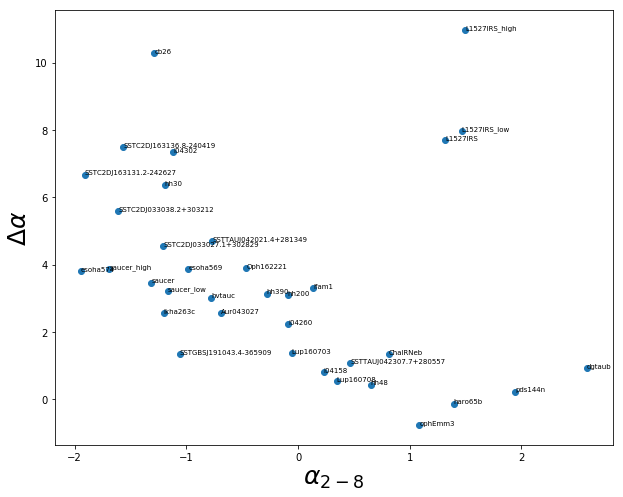

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(alpha,d_alpha)
ax.set_xlabel(r'$\alpha_{2-8}$',size=25);ax.set_ylabel(r'$\Delta \alpha$',size=25)
for i, txt in enumerate(names):
    ax.annotate(txt, (alpha[i], d_alpha[i]),fontsize=7)